In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("spam.csv",encoding="latin-1")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
data.rename(columns={"v1":"Target","v2":"Text"},inplace = True)

In [7]:
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Target', ylabel='count'>

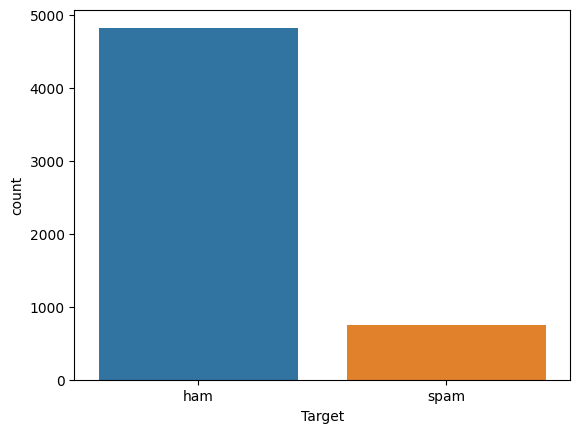

In [8]:
sns.countplot(data,x = "Target")

In [9]:
data["Target"].replace(["ham","spam"],[0,1],inplace=True)

In [10]:
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
y = data['Target']
x = data['Text']

In [12]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text) 
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ') 
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english') 
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text
x = x.apply(clean_text)

In [13]:
x

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4             nah dont think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object

In [14]:
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)

In [15]:
print(x)

  (0, 6971)	0.20811650121028438
  (0, 209)	0.36729583217496886
  (0, 2595)	0.1702687081017276
  (0, 1128)	0.3102930032592401
  (0, 848)	0.35062357349960643
  (0, 7177)	0.24960542549519968
  (0, 2631)	0.20289442006514496
  (0, 850)	0.3102930032592401
  (0, 441)	0.2747253039852123
  (0, 1394)	0.2844453385258622
  (0, 4727)	0.28728224601107955
  (0, 3283)	0.36729583217496886
  (1, 4375)	0.5680234078725725
  (1, 7085)	0.44852688817021014
  (1, 3253)	0.5441813263961918
  (1, 3422)	0.4243108797790347
  (2, 296)	0.22380019451500335
  (2, 5046)	0.22380019451500335
  (2, 6678)	0.16437544437908408
  (2, 6014)	0.26073766992216174
  (2, 4994)	0.2369821928885669
  (2, 5098)	0.22165169949344807
  (2, 6367)	0.16267681805953738
  (2, 3815)	0.20936579225284863
  (2, 6502)	0.2927044313024872
  :	:
  (5567, 1134)	0.2474392009823677
  (5567, 4883)	0.25991042977266576
  (5567, 4592)	0.27821955591264946
  (5567, 5046)	0.3073560855152239
  (5568, 2014)	0.782681381846728
  (5568, 2565)	0.43953417232463426
  (

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify = y)

In [18]:
classifier = SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9748743718592965

In [19]:
LRClassifier = LogisticRegression()
LRClassifier.fit(x_train,y_train)
y_pred = LRClassifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.949748743718593

In [20]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9655419956927495